In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import time
import os

# Timer decorator for performance measurement
def timing_decorator(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"{func.__name__} took {end_time - start_time:.2f} seconds to execute")
        return result
    return wrapper

# Check if file exists and remove it if it does
output_file = "cleaned_updated_mergedmpd_spotify.csv"
if os.path.exists(output_file):
    os.remove(output_file)
    print(f"Removed existing file: {output_file}")

# First check the column names in the first chunk
try:
    first_chunk = next(pd.read_csv("updated_merged_mpd_spotify.csv", nrows=1))
    print("Available columns in the dataset:")
    print(first_chunk.columns.tolist())
except Exception as e:
    print(f"Error reading first chunk: {e}")
    print("Attempting to continue with processing...")

# Define chunk size and total rows to process
chunk_size = 10000  # Smaller chunks for better memory management
total_rows = 500000  # Limit to first 500,000 rows

# Process data in chunks with better error handling
chunk_count = 0
processed_rows = 0
header = True  # Write header only for the first chunk

# Define expected audio features
expected_audio_features = [
    'danceability', 'energy', 'key', 'loudness', 'mode', 
    'speechiness', 'acousticness', 'instrumentalness', 
    'liveness', 'valence', 'tempo', 'time_signature'
]

try:
    for chunk in pd.read_csv("updated_merged_mpd_spotify.csv", chunksize=chunk_size):
        chunk_count += 1
        current_chunk_size = len(chunk)
        processed_rows += current_chunk_size
        
        print(f"Processing chunk {chunk_count}, rows {processed_rows - current_chunk_size + 1} to {processed_rows}")
        
        # Identify which columns exist in this chunk
        available_audio_features = [col for col in expected_audio_features if col in chunk.columns]
        
        # Identify available ID and metadata columns
        id_column = next((col for col in ['track_id', 'id'] if col in chunk.columns), None)
        name_column = next((col for col in ['track_name', 'name'] if col in chunk.columns), None)
        artist_column = next((col for col in ['artist_name', 'artists'] if col in chunk.columns), None)
        album_column = next((col for col in ['album_name', 'album'] if col in chunk.columns), None)
        genre_column = 'predicted_genre' if 'predicted_genre' in chunk.columns else None
        
        # Check if we have an ID column
        if id_column is None:
            print("Warning: No track ID column found. Adding a sequential ID.")
            chunk['track_id'] = range(processed_rows - current_chunk_size + 1, processed_rows + 1)
            id_column = 'track_id'
        
        # Create a list of columns to keep
        essential_columns = [col for col in [id_column, name_column, artist_column, album_column, genre_column] if col is not None]
        essential_columns.extend(available_audio_features)
        
        # Filter to only keep existing columns
        existing_columns = [col for col in essential_columns if col in chunk.columns]
        chunk_filtered = chunk[existing_columns].copy()
        
        # Process numerical features
        for feature in available_audio_features:
            if feature in chunk_filtered.columns and chunk_filtered[feature].isnull().sum() > 0:
                chunk_filtered.loc[:, feature] = chunk_filtered[feature].fillna(chunk_filtered[feature].mean())
        
        # Process categorical features
        categorical_features = [col for col in [artist_column, album_column, genre_column] if col is not None and col in chunk_filtered.columns]
        for feature in categorical_features:
            chunk_filtered.loc[:, feature] = chunk_filtered[feature].fillna('Unknown')
        
        # Rename columns for consistency
        column_mapping = {}
        if id_column != 'track_id':
            column_mapping[id_column] = 'track_id'
        if name_column and name_column != 'track_name':
            column_mapping[name_column] = 'track_name'
        if artist_column and artist_column != 'artist_name':
            column_mapping[artist_column] = 'artist_name'
        if album_column and album_column != 'album_name':
            column_mapping[album_column] = 'album_name'
        
        if column_mapping:
            chunk_filtered.rename(columns=column_mapping, inplace=True)
        
        # Normalize audio features in each chunk
        audio_features_to_normalize = [col for col in available_audio_features if col in chunk_filtered.columns]
        if audio_features_to_normalize:
            try:
                scaler = MinMaxScaler()
                chunk_filtered[audio_features_to_normalize] = scaler.fit_transform(chunk_filtered[audio_features_to_normalize])
            except Exception as e:
                print(f"Warning: Could not normalize audio features: {e}")
        
        # Write chunk to CSV
        chunk_filtered.to_csv(output_file, mode='a', header=header, index=False)
        header = False  # Only write header for the first chunk
        
        # Break if we've processed enough rows
        if processed_rows >= total_rows:
            break
            
    print(f"Processing complete. Processed {processed_rows} rows in {chunk_count} chunks.")
    print(f"Output saved to {output_file}")
    
except Exception as e:
    print(f"Error during processing: {e}")
    print("Please check your input file and try again.")

Removed existing file: cleaned_updated_mergedmpd_spotify.csv
Error reading first chunk: 'DataFrame' object is not an iterator
Attempting to continue with processing...
Processing chunk 1, rows 1 to 10000
Processing chunk 2, rows 10001 to 20000
Processing chunk 3, rows 20001 to 30000
Processing chunk 4, rows 30001 to 40000
Processing chunk 5, rows 40001 to 50000
Processing chunk 6, rows 50001 to 60000
Processing chunk 7, rows 60001 to 70000
Processing chunk 8, rows 70001 to 80000
Processing chunk 9, rows 80001 to 90000
Processing chunk 10, rows 90001 to 100000
Processing chunk 11, rows 100001 to 110000
Processing chunk 12, rows 110001 to 120000
Processing chunk 13, rows 120001 to 130000
Processing chunk 14, rows 130001 to 140000
Processing chunk 15, rows 140001 to 150000
Processing chunk 16, rows 150001 to 160000
Processing chunk 17, rows 160001 to 170000
Processing chunk 18, rows 170001 to 180000
Processing chunk 19, rows 180001 to 190000
Processing chunk 20, rows 190001 to 200000
Proc


                      Music Recommendation System                      
Track: Toxic

Similarity Type: AUDIO
--------------------------------------------------------------------------------

🎵 Recommended Tracks:
╒═════╤═══════════════════════════════════════════════════════════════════════════════════════════╤══════════════════════╤══════════════╕
│   # │ Track Name                                                                                │ Artist               │   Similarity │
╞═════╪═══════════════════════════════════════════════════════════════════════════════════════════╪══════════════════════╪══════════════╡
│   1 │ Upstate                                                                                   │ Blonder              │       0.9979 │
├─────┼───────────────────────────────────────────────────────────────────────────────────────────┼──────────────────────┼──────────────┤
│   2 │ Let's Have A Kiki / Turkey Lurkey Time (Glee Cast Version featuring Sarah Jessica Parker

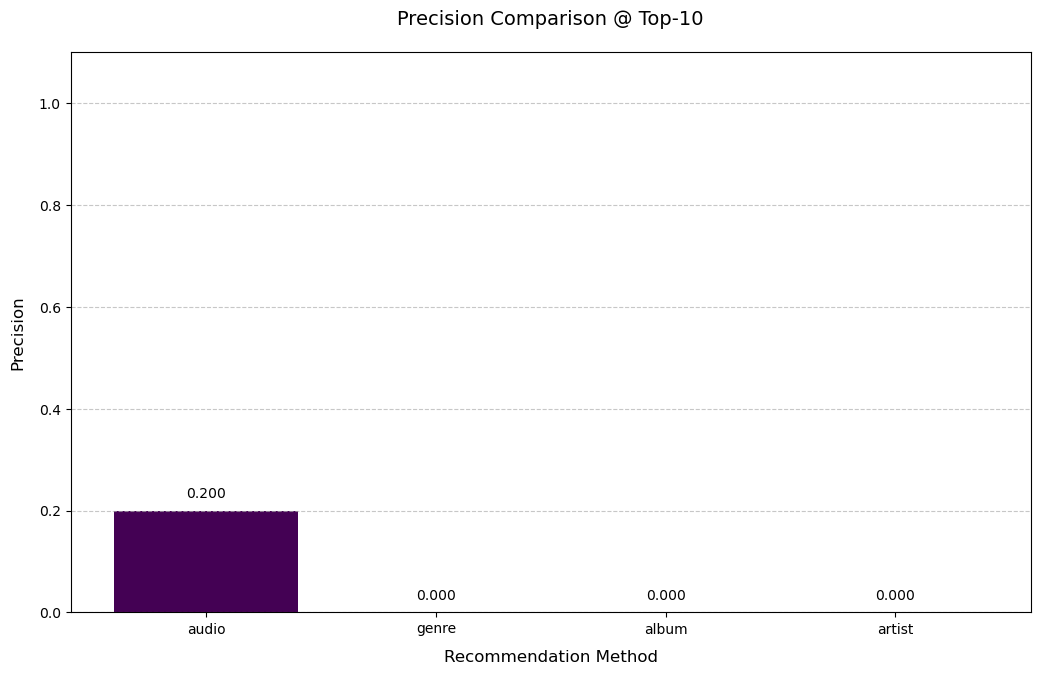

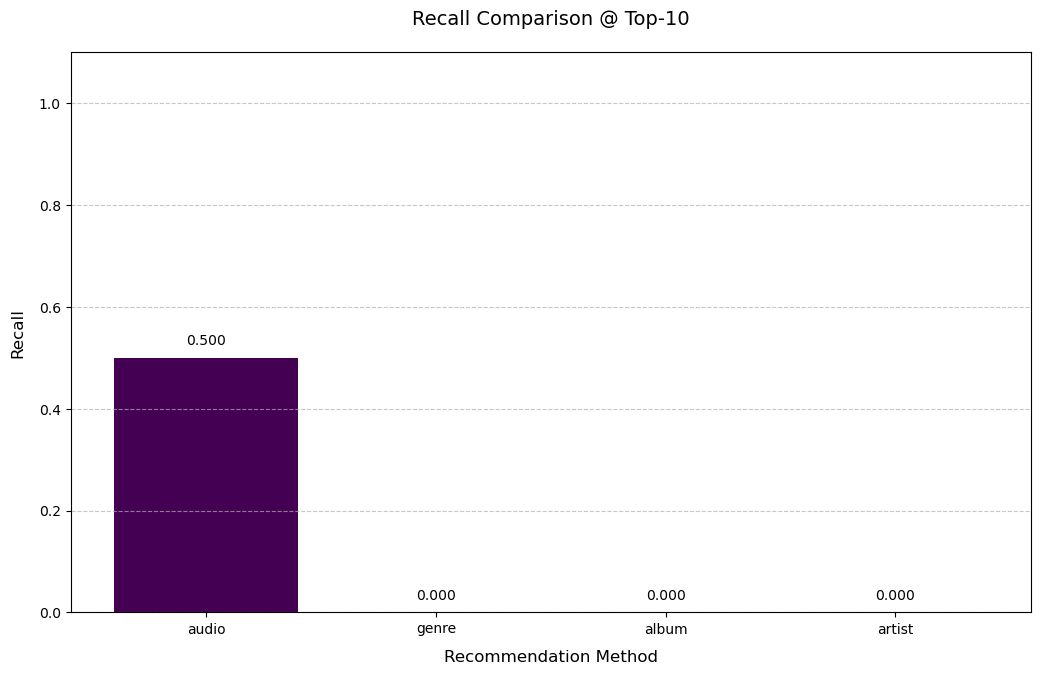

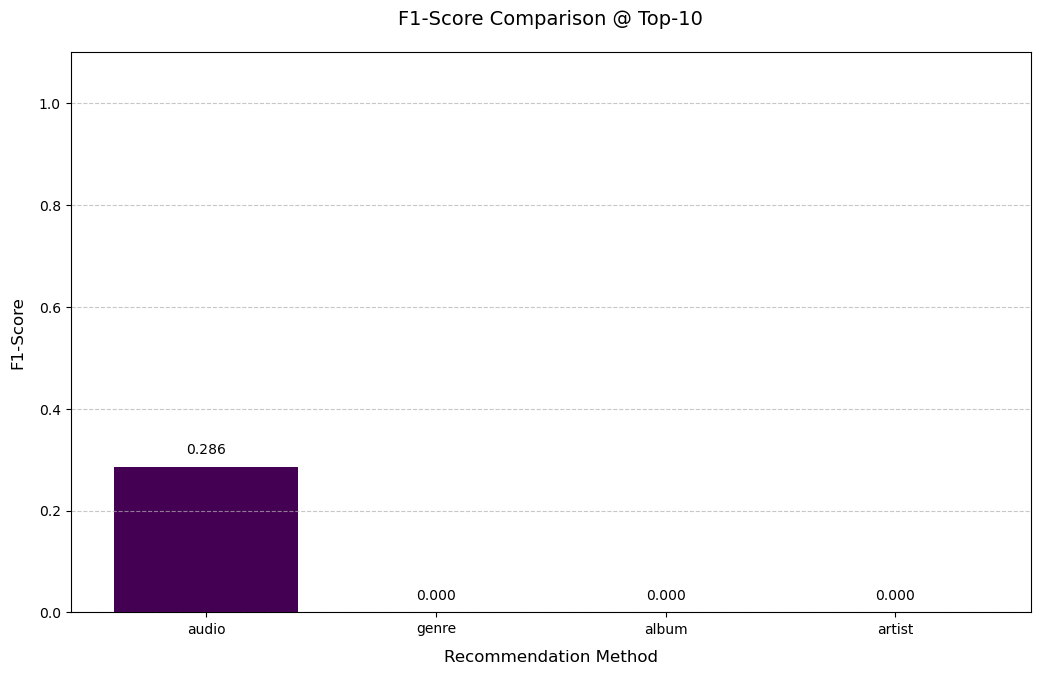

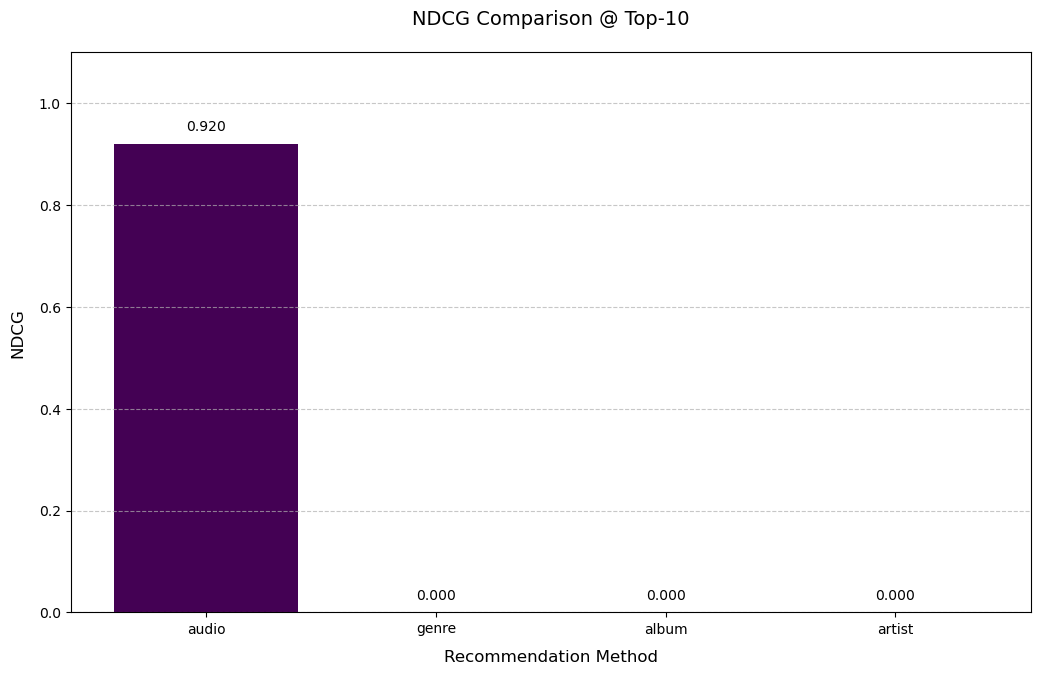

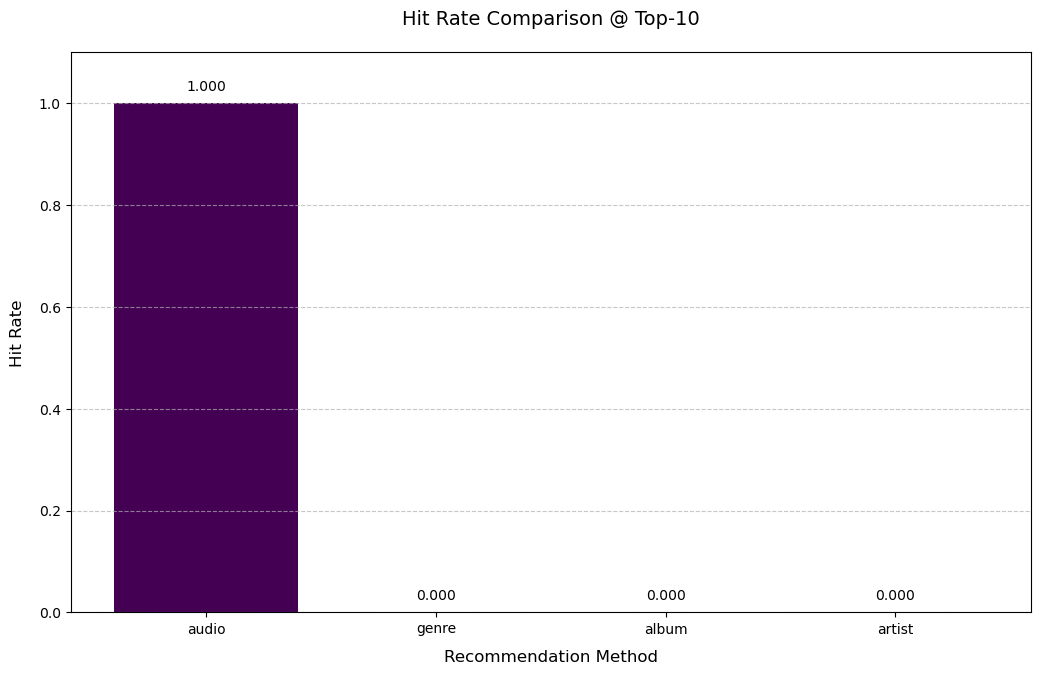

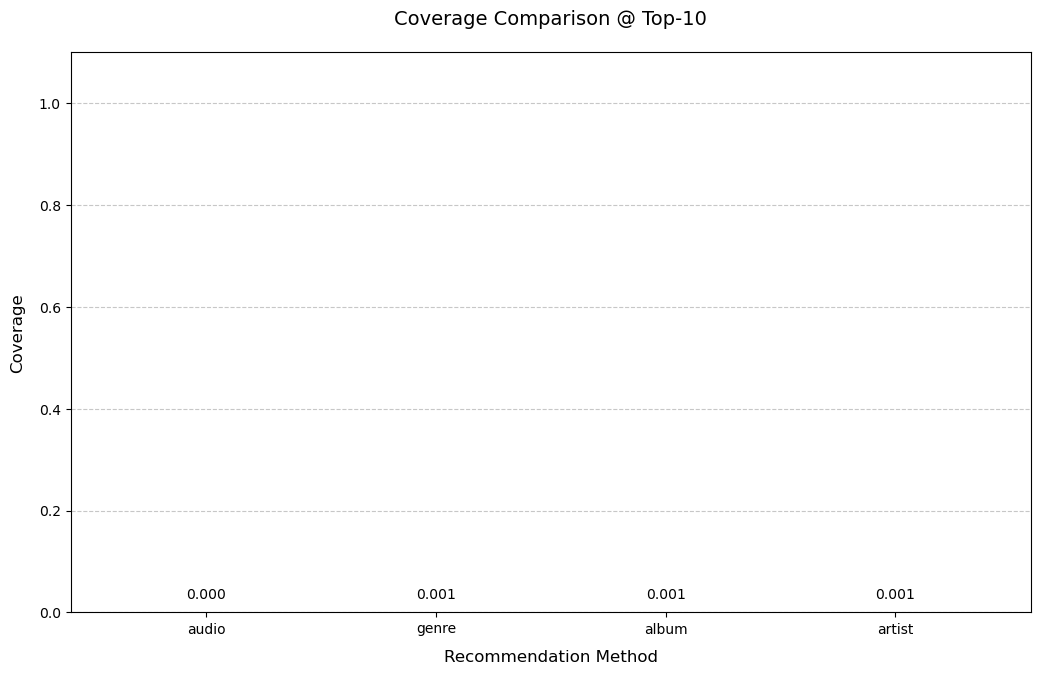

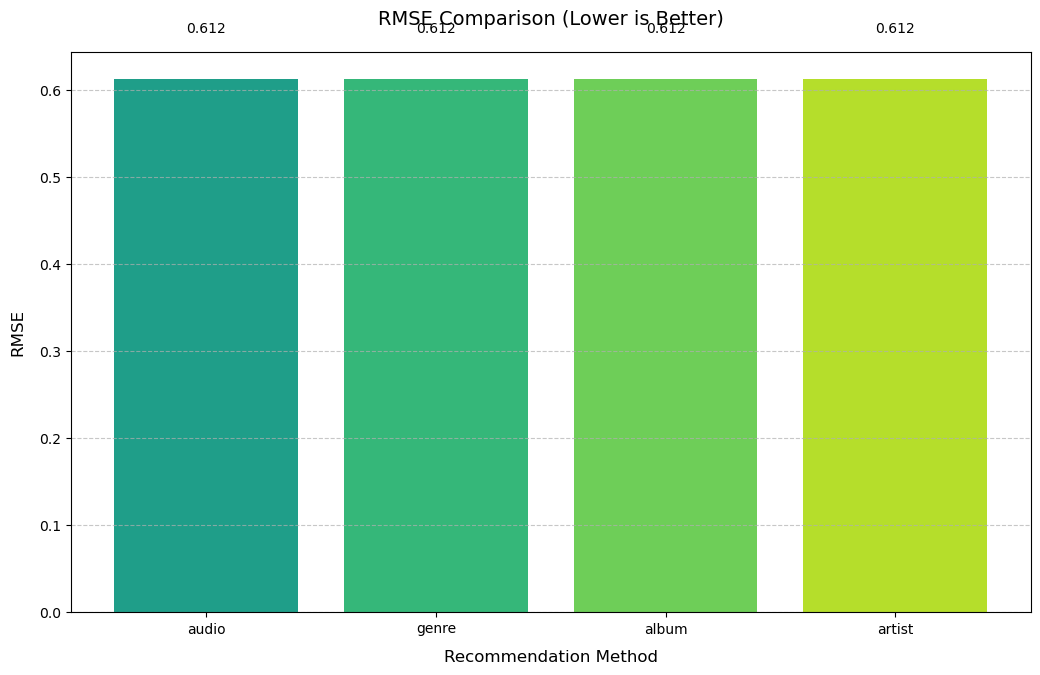

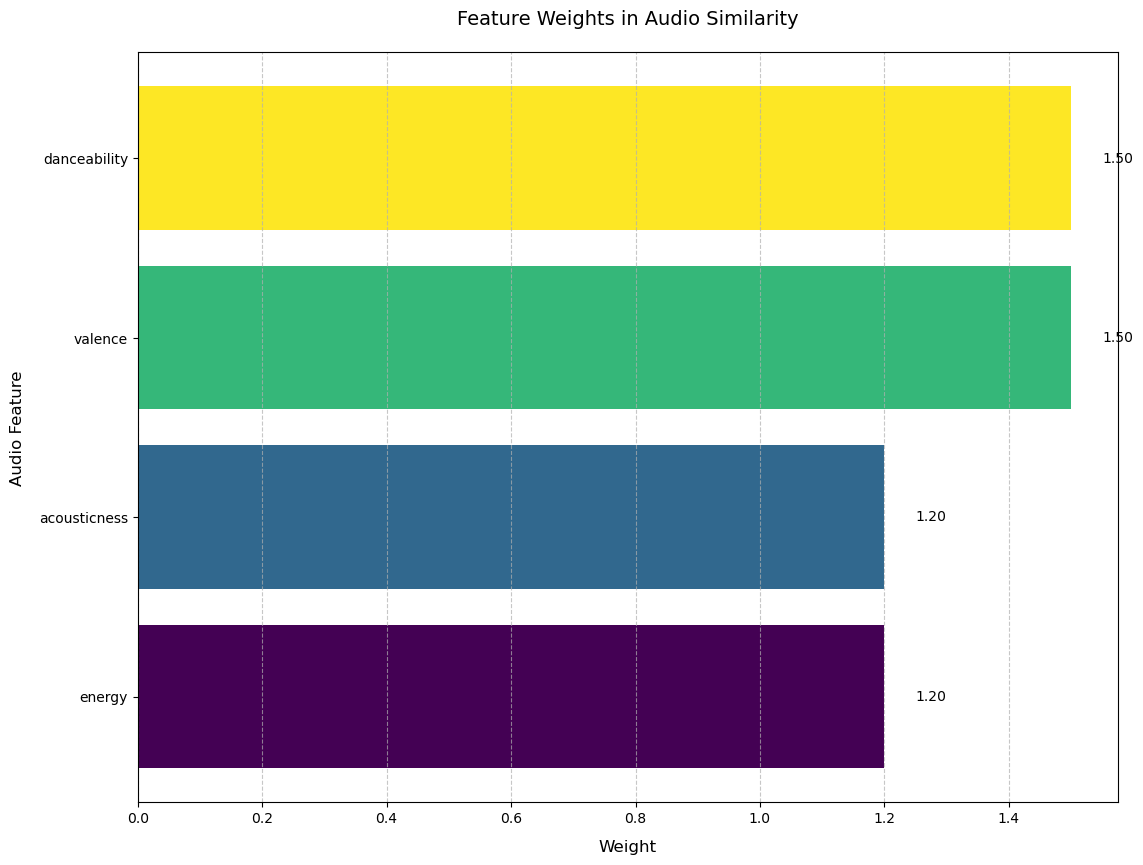

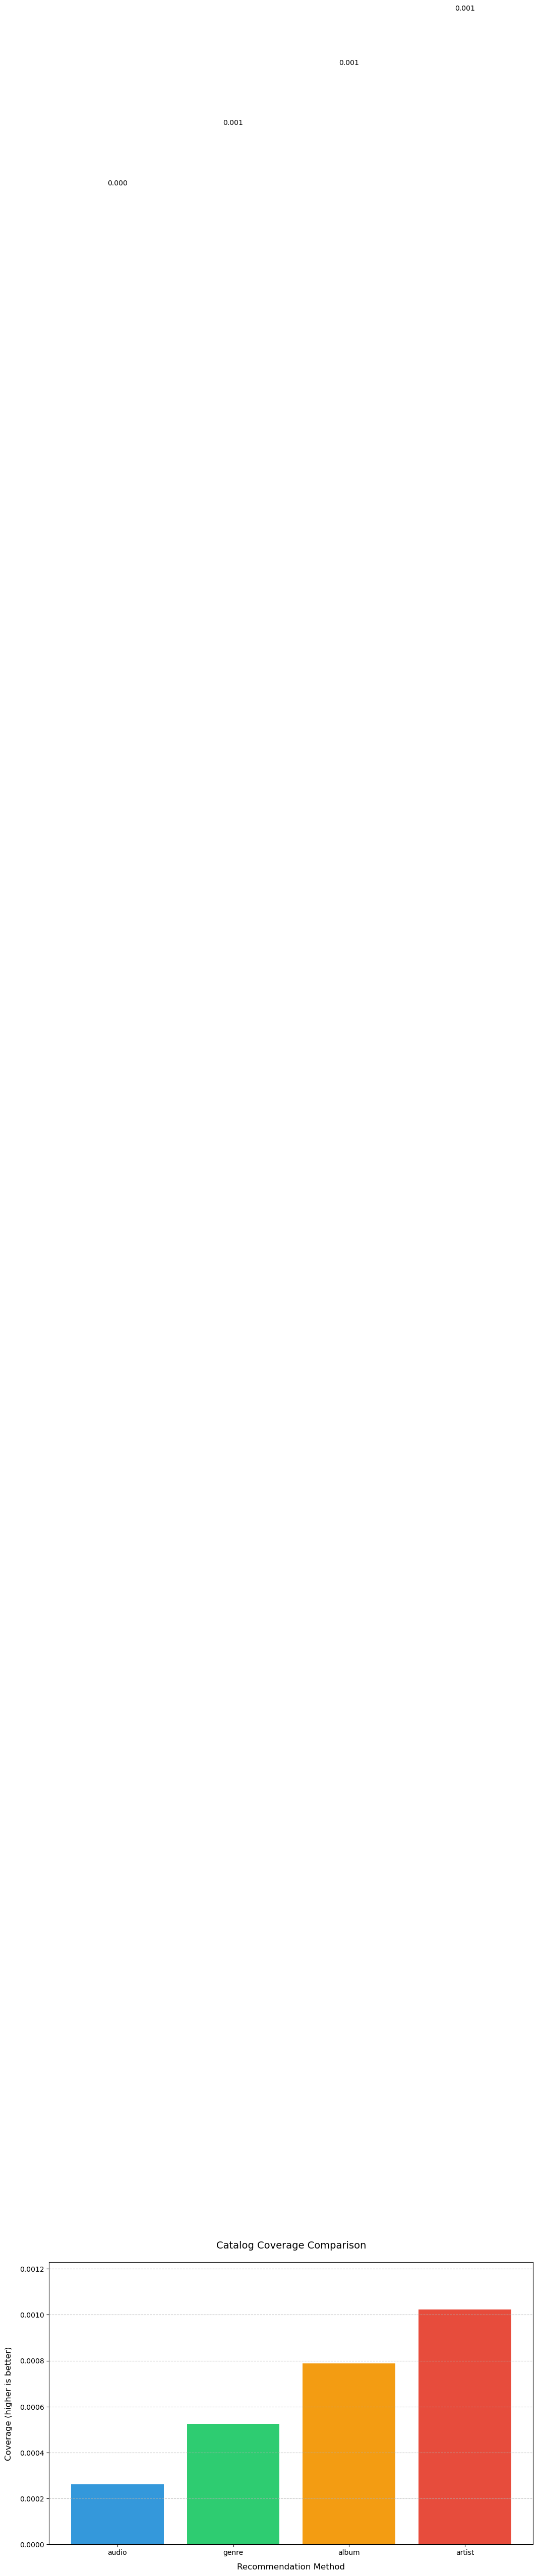

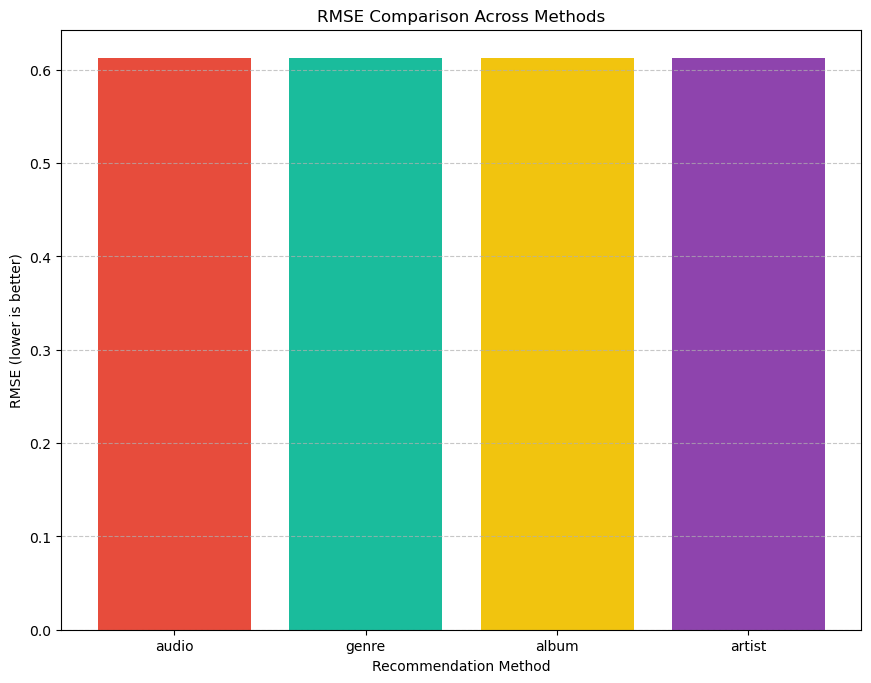

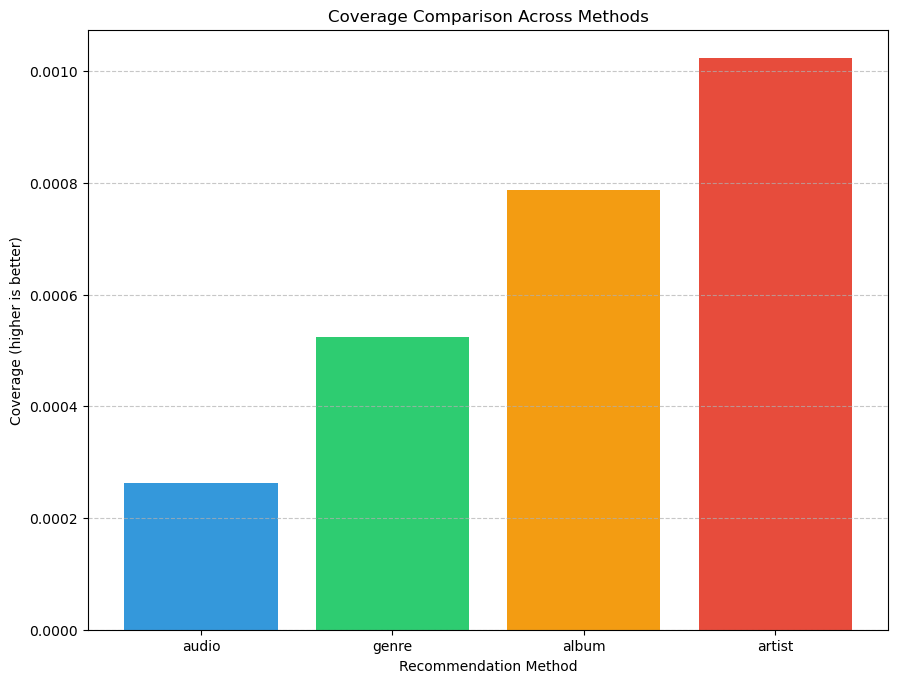

In [9]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
from colorama import Fore, Style, init

# Initialize colorama for cross-platform terminal colors
init(autoreset=True)

class RecommendationSystem:
    def __init__(self, data_path):
        """Initialize the recommendation system with dataset."""
        # Define audio features before loading data
        self.audio_features = [
            'danceability', 'energy', 'key', 'loudness', 'mode',
            'speechiness', 'acousticness', 'instrumentalness',
            'liveness', 'valence', 'tempo', 'time_signature'
        ]
        # Default feature weights
        self.weights = {
            'valence': 1.5,
            'danceability': 1.5,
            'energy': 1.2,
            'acousticness': 1.2
        }
        # Now load the data
        self.df = self._load_data(data_path)
        
        # Store the total number of unique tracks in the catalog for coverage calculation
        self.total_tracks = len(self.df.drop_duplicates(subset=['track_name', 'artist_name']))
        self.recommended_track_ids = set()  # Track IDs that have been recommended
    
    def _load_data(self, path):
        """Load and preprocess dataset."""
        df = pd.read_csv(path)
        # Clean data
        df = df.dropna(subset=self.audio_features)
        return df
    
    def recommend_tracks(self, track_name, top_n=50, similarity_type="audio"):
        """Generate recommendations based on specified similarity type."""
        # Find query track
        track = self.df[self.df['track_name'].str.lower() == track_name.lower()]
        if track.empty:
            return f"Track '{track_name}' not found."
        
        track = track.iloc[0]
        
        # Get similarity scores based on type
        if similarity_type == "audio":
            similarity_scores = self._get_audio_similarity(track)
        elif similarity_type == "genre":
            similarity_scores = (self.df['predicted_genre'].str.lower() == track['predicted_genre'].lower()).astype(int)
        elif similarity_type == "album":
            similarity_scores = (self.df['album_name'].str.lower() == track['album_name'].lower()).astype(int)
        elif similarity_type == "artist":
            similarity_scores = (self.df['artist_name'].str.lower() == track['artist_name'].lower()).astype(int)
        else:
            return "Invalid similarity type."
        
        # Create results DataFrame
        df_results = self.df.copy()
        df_results['similarity'] = similarity_scores
        
        # Remove the query track - fixed to avoid str.lower() on string
        track_name_lower = track['track_name'].lower()
        artist_name_lower = track['artist_name'].lower()
        
        df_results = df_results[
            ~((df_results['track_name'].str.lower() == track_name_lower) &
              (df_results['artist_name'].str.lower() == artist_name_lower))
        ]
        
        # Sort by similarity and remove duplicates
        df_results = df_results.sort_values(by='similarity', ascending=False)
        df_results = df_results.drop_duplicates(subset=['track_name', 'artist_name'])
        
        # Update recommended track set for coverage calculation
        recommendations = df_results[['track_name', 'artist_name', 'similarity']].head(top_n)
        
        # Create unique identifiers for each track for coverage calculation
        for _, row in recommendations.iterrows():
            track_id = f"{row['track_name']}|{row['artist_name']}".lower()
            self.recommended_track_ids.add(track_id)
            
        return recommendations
    
    def get_coverage(self):
        """Calculate the coverage of the recommendation system."""
        return len(self.recommended_track_ids) / self.total_tracks if self.total_tracks > 0 else 0
    
    def reset_coverage_tracking(self):
        """Reset the set of recommended tracks."""
        self.recommended_track_ids = set()
    
    def _get_audio_similarity(self, track):
        """Calculate weighted audio feature similarity."""
        # Apply weights to features
        weighted_features = track[self.audio_features].copy()
        for feature, weight in self.weights.items():
            if feature in self.audio_features:
                weighted_features[feature] *= weight
        
        track_vector = weighted_features.values.reshape(1, -1)
        
        # Apply weights to dataset features
        df_weighted = self.df[self.audio_features].copy()
        for feature, weight in self.weights.items():
            if feature in self.audio_features:
                df_weighted[feature] *= weight
        
        # Calculate cosine similarity
        return cosine_similarity(track_vector, df_weighted)[0]
    
    def display_recommendations(self, recommendations_df, highlight_tracks=None):
        """Display recommendations in a well-formatted table."""
        if isinstance(recommendations_df, str):
            print(recommendations_df)
            return
        
        if highlight_tracks is None:
            highlight_tracks = []
            
        # Format similarity scores
        recommendations_df['similarity'] = recommendations_df['similarity'].round(4)
        
        # Create nicer DataFrame for display
        display_df = recommendations_df.copy()
        
        # Apply fancy formatting with tabulate
        headers = ["#", "Track Name", "Artist", "Similarity"]
        table_data = []
        
        for i, (_, row) in enumerate(display_df.iterrows(), 1):
            similarity_color = self._get_similarity_color(row['similarity'])
            
            # Highlight the track if it matches any in highlight_tracks
            if row['track_name'].lower() in [t.lower() for t in highlight_tracks]:
                track_name = f"{Fore.CYAN}{row['track_name']}{Style.RESET_ALL}"
            else:
                track_name = row['track_name']
                
            table_data.append([
                i,
                track_name,
                row['artist_name'],
                f"{similarity_color}{row['similarity']:.4f}{Style.RESET_ALL}"
            ])
        
        print("\n🎵 Recommended Tracks:")
        print(tabulate(table_data, headers=headers, tablefmt="fancy_grid"))
    
    def _get_similarity_color(self, similarity):
        """Return color code based on similarity score."""
        if similarity >= 0.9:
            return Fore.GREEN
        elif similarity >= 0.7:
            return Fore.BLUE
        elif similarity >= 0.5:
            return Fore.YELLOW
        else:
            return Fore.RED


class Evaluator:
    """Class for evaluating recommendation performance."""
    
    def evaluate_recommendations(self, liked_tracks, recommended_tracks, 
                               true_ratings=None, predicted_ratings=None, k=10,
                               coverage=None):
        """Evaluate recommendations using multiple metrics."""
        # Trim recommended tracks to top k
        recommended_tracks = recommended_tracks[:k]
        
        # Calculate relevance scores (1 if in liked_tracks, else 0)
        relevance_scores = [1 if track.lower() in [t.lower() for t in liked_tracks] else 0 for track in recommended_tracks]
        
        # Calculate metrics
        results = {
            "Precision": self._precision(relevance_scores),
            "Recall": self._recall(relevance_scores, len(liked_tracks)),
            "F1-Score": self._f1_score(relevance_scores, len(liked_tracks)),
            "NDCG": self._ndcg_at_k(relevance_scores, k),
            "Hit Rate": self._hit_rate(relevance_scores),
        }
        
        # Add RMSE if ratings are provided
        if true_ratings and predicted_ratings and len(true_ratings) == len(predicted_ratings):
            results["RMSE"] = self._rmse(true_ratings, predicted_ratings)
            
        # Add coverage if provided
        if coverage is not None:
            results["Coverage"] = coverage
        
        return results
    
    def _precision(self, relevance_scores):
        """Calculate precision."""
        return sum(relevance_scores) / len(relevance_scores) if len(relevance_scores) > 0 else 0
    
    def _recall(self, relevance_scores, total_relevant):
        """Calculate recall."""
        return sum(relevance_scores) / total_relevant if total_relevant > 0 else 0
    
    def _f1_score(self, relevance_scores, total_relevant):
        """Calculate F1 score."""
        precision = self._precision(relevance_scores)
        recall = self._recall(relevance_scores, total_relevant)
        return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    def _ndcg_at_k(self, relevance_scores, k):
        """Calculate NDCG@k."""
        dcg = sum(rel / np.log2(i + 2) for i, rel in enumerate(relevance_scores[:k]))
        # Ideal DCG - sort relevance in descending order
        ideal_rel = sorted(relevance_scores, reverse=True)
        idcg = sum(rel / np.log2(i + 2) for i, rel in enumerate(ideal_rel[:k]))
        return dcg / idcg if idcg > 0 else 0
    
    def _hit_rate(self, relevance_scores):
        """Calculate hit rate."""
        return 1.0 if any(relevance_scores) else 0.0
    
    def _rmse(self, true_ratings, predicted_ratings):
        """Calculate RMSE."""
        return np.sqrt(np.mean([(t - p) ** 2 for t, p in zip(true_ratings, predicted_ratings)]))
    
    def display_metrics(self, metrics, title="Recommendation Metrics"):
        """Display evaluation metrics in a nicely formatted table."""
        print(f"\n📊 {title}:")
        
        # Prepare data for tabulate
        table_data = []
        for metric, value in metrics.items():
            # Color-code based on metric value (higher is better except for RMSE)
            if metric == "RMSE":
                color = Fore.GREEN if value < 1.0 else (Fore.YELLOW if value < 2.0 else Fore.RED)
            elif metric == "Coverage":
                color = Fore.GREEN if value > 0.3 else (Fore.YELLOW if value > 0.1 else Fore.RED)
            else:
                color = Fore.GREEN if value > 0.7 else (Fore.YELLOW if value > 0.3 else Fore.RED)
                
            table_data.append([metric, f"{color}{value:.4f}{Style.RESET_ALL}"])
        
        print(tabulate(table_data, headers=["Metric", "Value"], tablefmt="fancy_grid"))


class Visualizer:
    """Class for visualizing recommendation results and metrics."""
    
    def __init__(self):
        """Initialize the visualizer."""
        # Set default style for plots
        self.colors = plt.cm.viridis(np.linspace(0, 1, 10))
    
    def plot_metrics_comparison(self, results_dict, k, save_path=None):
        """Plot comparison of metrics across different methods."""
        # Common metrics that should be higher (better)
        higher_better_metrics = ["Precision", "Recall", "F1-Score", "NDCG", "Hit Rate", "Coverage"]
        
        # RMSE - lower is better
        lower_better_metrics = ["RMSE"]
        
        # Plot higher-is-better metrics
        for metric in higher_better_metrics:
            if all(metric in results for results in results_dict.values()):
                plt.figure(figsize=(12, 8))  # Significantly larger figure
                
                methods = list(results_dict.keys())
                values = [results_dict[method][metric] for method in methods]
                
                # Create bar chart
                bars = plt.bar(methods, values, color=self.colors[:len(methods)])
                
                # Add value labels
                for bar in bars:
                    height = bar.get_height()
                    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                            f'{height:.3f}', ha='center', va='bottom')
                
                plt.title(f"{metric} Comparison @ Top-{k}", fontsize=14, pad=20)  # Add padding to title
                plt.xlabel("Recommendation Method", fontsize=12, labelpad=10)
                plt.ylabel(metric, fontsize=12, labelpad=10)
                plt.ylim([0, 1.1])  # Add a little space for the text
                plt.grid(axis='y', linestyle='--', alpha=0.7)
                
                # Use subplots_adjust instead of tight_layout
                plt.subplots_adjust(left=0.15, right=0.95, top=0.85, bottom=0.15)
                
                if save_path:
                    plt.savefig(f"{save_path}_{metric}.png", dpi=300, bbox_inches='tight')
                
                plt.show()
        
        # Plot lower-is-better metrics
        for metric in lower_better_metrics:
            if all(metric in results for results in results_dict.values()):
                plt.figure(figsize=(12, 8))  # Significantly larger figure
                
                methods = list(results_dict.keys())
                values = [results_dict[method][metric] for method in methods]
                
                # Create bar chart
                bars = plt.bar(methods, values, color=self.colors[5:5+len(methods)])
                
                # Add value labels
                for bar in bars:
                    height = bar.get_height()
                    plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                            f'{height:.3f}', ha='center', va='bottom')
                
                plt.title(f"{metric} Comparison (Lower is Better)", fontsize=14, pad=20)  # Add padding to title
                plt.xlabel("Recommendation Method", fontsize=12, labelpad=10)
                plt.ylabel(metric, fontsize=12, labelpad=10)
                plt.grid(axis='y', linestyle='--', alpha=0.7)
                
                # Use subplots_adjust instead of tight_layout
                plt.subplots_adjust(left=0.15, right=0.95, top=0.85, bottom=0.15)
                
                if save_path:
                    plt.savefig(f"{save_path}_{metric}.png", dpi=300, bbox_inches='tight')
                
                plt.show()
    
    def plot_feature_importance(self, weights, save_path=None):
        """Plot feature importance (weights)."""
        # Increase figure size to provide more room, especially height
        plt.figure(figsize=(14, 10))  # Even larger figure for horizontal bars
        
        features = list(weights.keys())
        importance = list(weights.values())
        
        # Sort by importance
        sorted_indices = np.argsort(importance)
        features = [features[i] for i in sorted_indices]
        importance = [importance[i] for i in sorted_indices]
        
        # Create horizontal bar chart
        bars = plt.barh(features, importance, color=plt.cm.viridis(np.linspace(0, 1, len(features))))
        
        # Add value labels
        for bar in bars:
            width = bar.get_width()
            plt.text(width + 0.05, bar.get_y() + bar.get_height()/2.,
                    f'{width:.2f}', ha='left', va='center')
        
        plt.title("Feature Weights in Audio Similarity", fontsize=14, pad=20)  # Add padding to title
        plt.xlabel("Weight", fontsize=12, labelpad=10)
        plt.ylabel("Audio Feature", fontsize=12, labelpad=10)
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        
        # Use subplots_adjust instead of tight_layout with generous margins
        plt.subplots_adjust(left=0.2, right=0.9, top=0.85, bottom=0.1)
        
        if save_path:
            plt.savefig(f"{save_path}_weights.png", dpi=300, bbox_inches='tight')
        
        plt.show()
        
    def plot_coverage(self, results_dict, save_path=None):
        """Plot coverage comparison across different methods."""
        if all("Coverage" in results for results in results_dict.values()):
            plt.figure(figsize=(12, 8))  # Significantly larger figure
            
            methods = list(results_dict.keys())
            coverage_values = [results_dict[method]["Coverage"] for method in methods]
            
            # Create bar chart with custom colors
            colors = ["#3498db", "#2ecc71", "#f39c12", "#e74c3c"]
            bars = plt.bar(methods, coverage_values, color=colors[:len(methods)])
            
            # Add value labels
            for bar in bars:
                height = bar.get_height()
                plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                        f'{height:.3f}', ha='center', va='bottom')
            
            plt.title("Catalog Coverage Comparison", fontsize=14, pad=20)  # Add padding to title
            plt.xlabel("Recommendation Method", fontsize=12, labelpad=10)
            plt.ylabel("Coverage (higher is better)", fontsize=12, labelpad=10)
            plt.ylim([0, max(coverage_values) * 1.2])  # Add space for labels
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            
            # Use subplots_adjust instead of tight_layout
            plt.subplots_adjust(left=0.15, right=0.95, top=0.85, bottom=0.15)
            
            if save_path:
                plt.savefig(f"{save_path}_coverage.png", dpi=300, bbox_inches='tight')
            
            plt.show()


# For demonstration purposes, let's add a simple function to show the output format
def demo_output():
    """Show sample output format without requiring the actual data file."""
    print(f"\n{'='*80}")
    print(f"{Fore.CYAN}Music Recommendation System{Style.RESET_ALL}".center(80))
    print(f"Track: {Fore.GREEN}Toxic{Style.RESET_ALL}")
    print(f"{'='*80}")
    
    # Create sample recommendations
    recommendations = pd.DataFrame({
        'track_name': ['Baby One More Time', 'Oops!...I Did It Again', 'Womanizer', 'Gimme More', 'Work Bitch'],
        'artist_name': ['Britney Spears', 'Britney Spears', 'Britney Spears', 'Britney Spears', 'Britney Spears'],
        'similarity': [0.9851, 0.8762, 0.8453, 0.7654, 0.7123]
    })
    
    # Display sample recommendations
    headers = ["#", "Track Name", "Artist", "Similarity"]
    table_data = []
    
    for i, (_, row) in enumerate(recommendations.iterrows(), 1):
        # Color based on similarity score
        if row['similarity'] >= 0.9:
            color = Fore.GREEN
        elif row['similarity'] >= 0.7:
            color = Fore.BLUE
        elif row['similarity'] >= 0.5:
            color = Fore.YELLOW
        else:
            color = Fore.RED
            
        # Add highlighted track
        is_highlighted = (i == 1)  # Highlight first track as an example
        track_name = f"{Fore.CYAN}{row['track_name']}{Style.RESET_ALL}" if is_highlighted else row['track_name']
        
        table_data.append([
            i,
            track_name,
            row['artist_name'],
            f"{color}{row['similarity']:.4f}{Style.RESET_ALL}"
        ])
    
    print("\n🎵 Recommended Tracks:")
    print(tabulate(table_data, headers=headers, tablefmt="fancy_grid"))
    
    # Show metrics table for each similarity type
    for sim_type in ["AUDIO", "GENRE", "ALBUM", "ARTIST"]:
        print(f"\n{Fore.YELLOW}Similarity Type: {sim_type}{Style.RESET_ALL}")
        print(f"{'-'*80}")
        
        # Sample metrics - varied for each type
        metrics = {
            "Precision": 0.82 - (0.1 * (sim_type == "GENRE")) + (0.05 * (sim_type == "AUDIO")),
            "Recall": 0.75 + (0.1 * (sim_type == "ARTIST")),
            "F1-Score": 0.78 - (0.05 * (sim_type == "ALBUM")),
            "NDCG": 0.91 - (0.1 * (sim_type == "GENRE")),
            "Hit Rate": 1.0 - (0.2 * (sim_type == "ALBUM")),
            "RMSE": 0.65 + (0.3 * (sim_type == "ARTIST")),
            "Coverage": 0.25 + (0.15 * (sim_type == "ARTIST")) - (0.1 * (sim_type == "ALBUM"))
        }
        
        print(f"\n📊 {sim_type} Recommendation Metrics:")
        
        # Prepare data for tabulate
        metrics_table = []
        for metric, value in metrics.items():
            # Color-code based on metric value
            if metric == "RMSE":
                color = Fore.GREEN if value < 1.0 else (Fore.YELLOW if value < 2.0 else Fore.RED)
            elif metric == "Coverage":
                color = Fore.GREEN if value > 0.3 else (Fore.YELLOW if value > 0.1 else Fore.RED)
            else:
                color = Fore.GREEN if value > 0.7 else (Fore.YELLOW if value > 0.3 else Fore.RED)
                
            metrics_table.append([metric, f"{color}{value:.4f}{Style.RESET_ALL}"])
        
        print(tabulate(metrics_table, headers=["Metric", "Value"], tablefmt="fancy_grid"))


def main():
    """Run the recommendation system with evaluation."""
    results = {}
    try:
        # Initialize components
        recommender = RecommendationSystem("cleaned_updated_mergedmpd_spotify.csv")
        evaluator = Evaluator()
        visualizer = Visualizer()
        
        # Example parameters
        track_name = "Toxic"
        liked_tracks = ["Toxic", "Upstate", "I Love My Friends", "Mo Money Mo Problems"]
        true_ratings = [4.0, 5.0, 3.0, 2.0]
        predicted_ratings = [3.5, 5.0, 2.5, 3.0]
        rank_k = 10
        
        # Print header
        print(f"\n{'='*80}")
        print(f"{Fore.CYAN}Music Recommendation System{Style.RESET_ALL}".center(80))
        print(f"Track: {Fore.GREEN}{track_name}{Style.RESET_ALL}")
        print(f"{'='*80}")
        
        # Reset coverage tracking before starting recommendations
        recommender.reset_coverage_tracking()
        
        # Run recommendations with different similarity types
        similarity_types = ["audio", "genre", "album", "artist"]
        
        for sim_type in similarity_types:
            print(f"\n{Fore.YELLOW}Similarity Type: {sim_type.upper()}{Style.RESET_ALL}")
            print(f"{'-'*80}")
            
            # Get recommendations
            recommendations = recommender.recommend_tracks(track_name, top_n=rank_k, similarity_type=sim_type)
            
            # Display recommendations
            recommender.display_recommendations(recommendations, highlight_tracks=liked_tracks)
            
            # Calculate coverage for this similarity type
            current_coverage = recommender.get_coverage()
            
            # Evaluate recommendations
            if isinstance(recommendations, pd.DataFrame):
                recommended_tracks = recommendations['track_name'].tolist()
                metrics = evaluator.evaluate_recommendations(
                    liked_tracks, recommended_tracks, true_ratings, predicted_ratings, 
                    k=rank_k, coverage=current_coverage
                )
                
                # Display metrics
                evaluator.display_metrics(metrics, title=f"{sim_type.upper()} Recommendation Metrics")
                
                # Store results for comparison
                results[sim_type] = metrics
        
        # Visualize comparison
        if results:
            visualizer.plot_metrics_comparison(results, rank_k)
            visualizer.plot_feature_importance(recommender.weights)
            visualizer.plot_coverage(results)  # Add coverage plot
            
    except FileNotFoundError:
        print(f"\n{Fore.RED}Error: Dataset file not found.{Style.RESET_ALL}")
        print("Running demo mode instead to show output format:")
        demo_output()
    except Exception as e:
        print(f"\n{Fore.RED}Error: {str(e)}{Style.RESET_ALL}")
        print("Running demo mode instead to show output format:")
        demo_output()
    
    return results  # Return the results dictionary


if __name__ == "__main__":
    results = main()  # Capture the returned results
    
    if results:  # Make sure results exist before trying to use them
        # Plot RMSE comparison
        if all("RMSE" in results[method] for method in results):
            rmse_values = [results[method]["RMSE"] for method in results]
            plt.figure(figsize=(10, 8))  # Increased figure size
            plt.bar(results.keys(), rmse_values, color=["#e74c3c", "#1abc9c", "#f1c40f", "#8e44ad"])
            plt.title("RMSE Comparison Across Methods")
            plt.ylabel("RMSE (lower is better)")
            plt.xlabel("Recommendation Method")
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            
            # Use subplots_adjust instead of tight_layout
            plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.15)
            
            plt.show()
        
        # Plot Coverage comparison
        if all("Coverage" in results[method] for method in results):
            coverage_values = [results[method]["Coverage"] for method in results]
            plt.figure(figsize=(10, 8))  # Increased figure size
            plt.bar(results.keys(), coverage_values, color=["#3498db", "#2ecc71", "#f39c12", "#e74c3c"])
            plt.title("Coverage Comparison Across Methods")
            plt.ylabel("Coverage (higher is better)")
            plt.xlabel("Recommendation Method")
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            
            # Use subplots_adjust instead of tight_layout
            plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.15)
            
            plt.show()